<a href="https://colab.research.google.com/github/natashamuthoni2333/Age-Gender-Detect-OpenCv/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# CUSTOMER CHURN PREDICTION

# Step 1: Upload and load the dataset
import pandas as pd
from google.colab import files

# Upload the file from your computer
uploaded = files.upload()   # 👈 choose WA_Fn-UseC_-Telco-Customer-Churn.csv

# Automatically detect uploaded file name
filename = list(uploaded.keys())[0]

# Read the dataset
df = pd.read_csv(filename)

# Preview a few rows
print("✅ File uploaded successfully!")
print("Dataset shape:", df.shape)
print("\nSample data:\n", df.head())

# Check data info
print("\nDataset Info:\n")
print(df.info())

# Check missing values
print("\nMissing values per column:\n")
print(df.isnull().sum())


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn (2).csv
✅ File uploaded successfully!
Dataset shape: (7043, 21)

Sample data:
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ... 

In [ ]:
# CUSTOMER CHURN PREDICTION

import pandas as pd

# Load the dataset
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Preview first few rows
print(df.head())

# Check dataset information
print("\nDataset Info:\n")
print(df.info())

# Check for missing values
print("\nMissing Values:\n")
print(df.isnull().sum())

# Display shape
print("\nDataset shape:", df.shape)


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Convert 'TotalCharges' to numeric (it has some blank strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop any rows with missing TotalCharges
df.dropna(subset=['TotalCharges'], inplace=True)

# Encode target variable 'Churn' (Yes=1, No=0)
df['Churn_Yes'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Drop columns not needed for modeling
df_dropped = df.drop(['customerID', 'Churn'], axis=1)

# Convert categorical columns to dummy/one-hot variables
df_dummies = pd.get_dummies(df_dropped, drop_first=True)

# Define X (features) and y (target)
X = df_dummies.drop('Churn_Yes', axis=1)
y = df_dummies['Churn_Yes']

# Split data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("✅ Data ready for modeling!")
print("Training set:", X_train.shape)
print("Testing set:", X_test.shape)


✅ Data ready for modeling!
Training set: (4922, 30)
Testing set: (2110, 30)


In [ ]:
# Step 3: Model Training & Evaluation

# Import required libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize models
log_model = LogisticRegression(max_iter=1000, random_state=42)
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train models
log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate models
print("✅ Logistic Regression Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_log), 4))
print(classification_report(y_test, y_pred_log))

print("✅ Random Forest Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_rf), 4))
print(classification_report(y_test, y_pred_rf))

print("✅ XGBoost Results:")
print("Accuracy:", round(accuracy_score(y_test, y_pred_xgb), 4))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [09:09:36] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Logistic Regression Results:
Accuracy: 0.8047
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.65      0.56      0.61       561

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110

✅ Random Forest Results:
Accuracy: 0.7839
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.48      0.54       561

    accuracy                           0.78      2110
   macro avg       0.72      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110

✅ XGBoost Results:
Accuracy: 0.7791
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1549
           1       0.60      0.52      0.56       561

    accuracy                           0.78      2110
  

/tmp/ipython-input-351125505.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_top_features.values, y=rf_top_features.index, palette="Reds_r")


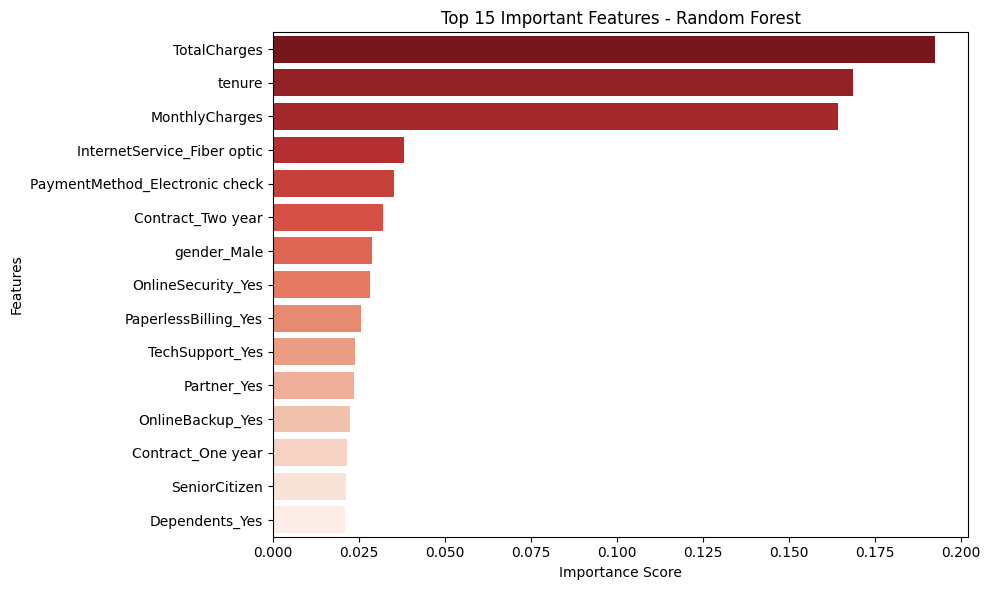

/tmp/ipython-input-351125505.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_top_features.values, y=xgb_top_features.index, palette="Oranges_r")


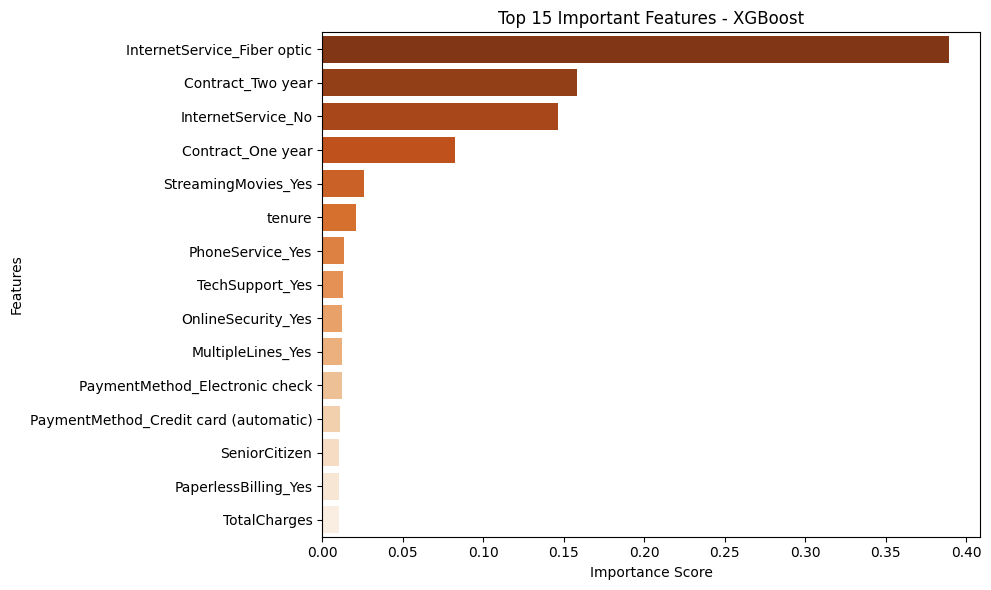

In [ ]:
# Step 4: Feature Importance Visualization

import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from Random Forest
rf_importance = pd.Series(rf_model.feature_importances_, index=X_train.columns)
rf_top_features = rf_importance.sort_values(ascending=False).head(15)

# Plot Random Forest feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=rf_top_features.values, y=rf_top_features.index, palette="Reds_r")
plt.title("Top 15 Important Features - Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

# Get feature importances from XGBoost
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
xgb_top_features = xgb_importance.sort_values(ascending=False).head(15)

# Plot XGBoost feature importance
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_top_features.values, y=xgb_top_features.index, palette="Oranges_r")
plt.title("Top 15 Important Features - XGBoost")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


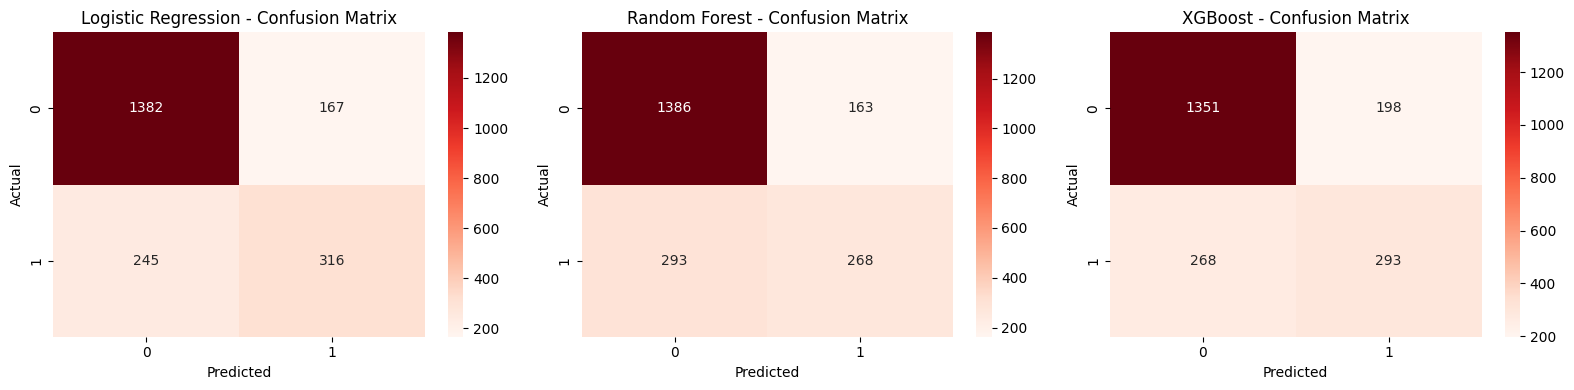

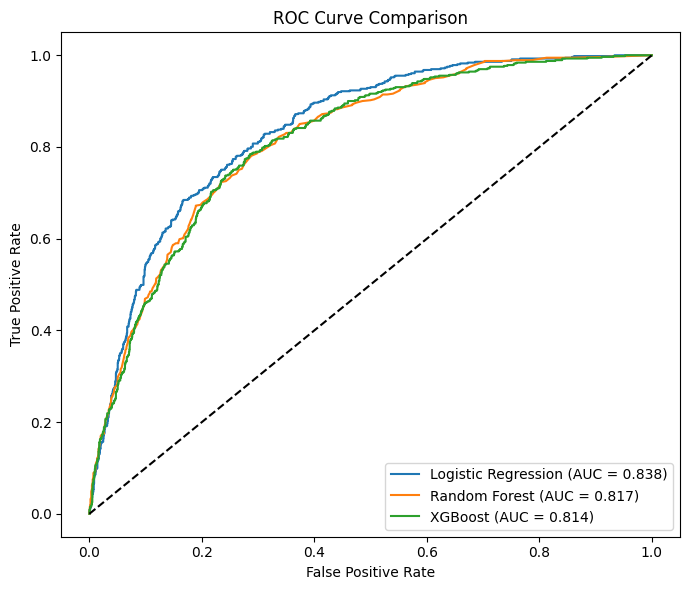

✅ Models saved successfully as 'log_model.pkl', 'rf_model.pkl', and 'xgb_model.pkl'


In [ ]:
# Step 5: Model Evaluation & Saving
from sklearn.metrics import confusion_matrix, roc_curve, auc
import pickle

# --- Confusion Matrices for all models ---
models = {
    "Logistic Regression": (log_model, y_pred_log),
    "Random Forest": (rf_model, y_pred_rf),
    "XGBoost": (xgb_model, y_pred_xgb)
}

plt.figure(figsize=(16,4))

for i, (name, (model, preds)) in enumerate(models.items(), 1):
    cm = confusion_matrix(y_test, preds)
    plt.subplot(1, 3, i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

plt.tight_layout()
plt.show()

# --- ROC Curve comparison ---
plt.figure(figsize=(7,6))

for name, (model, _) in models.items():
    y_prob = model.predict_proba(X_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.3f})')

plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()

# --- Save trained models to files ---
with open('log_model.pkl', 'wb') as f:
    pickle.dump(log_model, f)

with open('rf_model.pkl', 'wb') as f:
    pickle.dump(rf_model, f)

with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(xgb_model, f)

print("✅ Models saved successfully as 'log_model.pkl', 'rf_model.pkl', and 'xgb_model.pkl'")


In [ ]:
# Step 6: Load Saved Models & Make Predictions
import pickle
import numpy as np
import pandas as pd

# --- Load the saved models ---
with open('log_model.pkl', 'rb') as f:
    loaded_log_model = pickle.load(f)

with open('rf_model.pkl', 'rb') as f:
    loaded_rf_model = pickle.load(f)

with open('xgb_model.pkl', 'rb') as f:
    loaded_xgb_model = pickle.load(f)

print("✅ Models loaded successfully!\n")

# --- Create a new sample record for prediction ---
# (Make sure columns match your training features)
sample = X_test.iloc[0:1]     # take one random sample from test set

print("Sample Input:")
print(sample.head())

# --- Predict using each loaded model ---
pred_log = loaded_log_model.predict(sample)
pred_rf  = loaded_rf_model.predict(sample)
pred_xgb = loaded_xgb_model.predict(sample)

# --- Display predictions ---
print("\nPredictions on sample input:")
print(f"Logistic Regression → {'Churn' if pred_log[0]==1 else 'No Churn'}")
print(f"Random Forest       → {'Churn' if pred_rf[0]==1 else 'No Churn'}")
print(f"XGBoost             → {'Churn' if pred_xgb[0]==1 else 'No Churn'}")


✅ Models loaded successfully!

Sample Input:
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
4221              0       1            19.3          19.3         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
4221        False           False              True   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
4221                           False              False  ...   

      StreamingTV_No internet service  StreamingTV_Yes  \
4221                             True            False   

      StreamingMovies_No internet service  StreamingMovies_Yes  \
4221                                 True                False   

      Contract_One year  Contract_Two year  PaperlessBilling_Yes  \
4221              False              False                 False   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
4221                                   True                           False   

      PaymentMethod_

✅ Model Performance Summary:

                 Model  Accuracy  Precision    Recall  F1_Score   ROC_AUC
0  Logistic Regression  0.804739   0.654244  0.563280  0.605364  0.838095
1        Random Forest  0.783886   0.621810  0.477718  0.540323  0.816833
2              XGBoost  0.779147   0.596741  0.522282  0.557034  0.814030


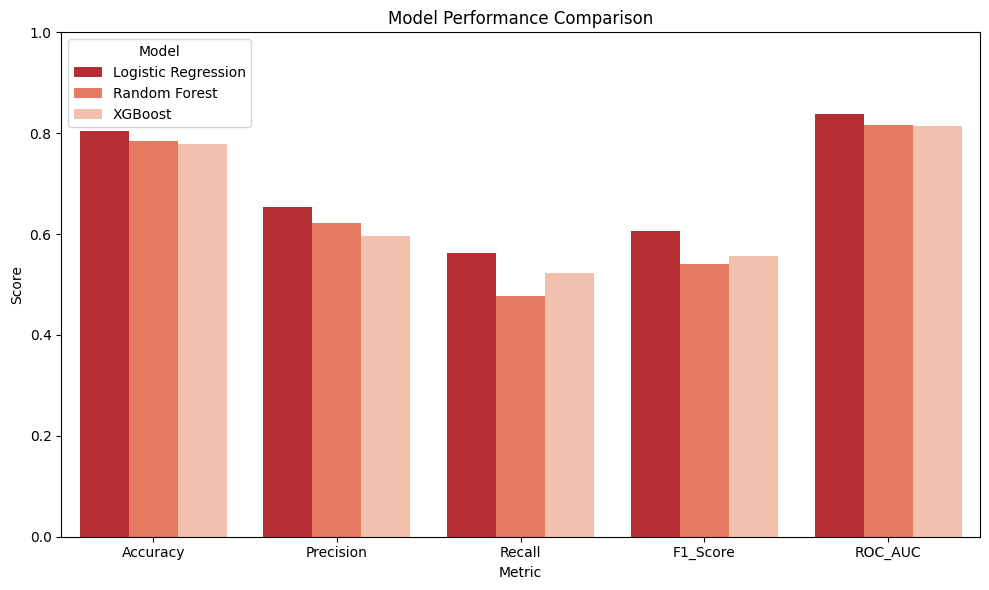

In [ ]:
# Step 7: Model Performance Comparison

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Evaluate all models and store metrics
models = {
    "Logistic Regression": log_model,
    "Random Forest": rf_model,
    "XGBoost": xgb_model
}

metrics = []

for name, model in models.items():
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    metrics.append([name, acc, prec, rec, f1, auc])

# Create a comparison DataFrame
results_df = pd.DataFrame(metrics, columns=["Model", "Accuracy", "Precision", "Recall", "F1_Score", "ROC_AUC"])
results_df = results_df.sort_values(by="ROC_AUC", ascending=False).reset_index(drop=True)

print("✅ Model Performance Summary:\n")
print(results_df)

# Plot comparison chart
plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
            x='Metric', y='Score', hue='Model', palette='Reds_r')
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()


In [ ]:
# Step 8: Export Results and Clean Data

# Save model performance comparison table
results_df.to_csv("model_performance_summary.csv", index=False)

# Save cleaned dataset (with the Churn_Yes column)
df.to_csv("cleaned_telco_dataset.csv", index=False)

print("✅ Files saved successfully!")
print("1️⃣ model_performance_summary.csv  — model comparison results")
print("2️⃣ cleaned_telco_dataset.csv      — cleaned dataset ready for future use")

# Display confirmation
import os
print("\nSaved files in current directory:")
print(os.listdir())


✅ Files saved successfully!
1️⃣ model_performance_summary.csv  — model comparison results
2️⃣ cleaned_telco_dataset.csv      — cleaned dataset ready for future use

Saved files in current directory:
['.config', 'cleaned_telco_dataset.csv', 'WA_Fn-UseC_-Telco-Customer-Churn (2).csv', 'rf_model.pkl', 'model_performance_summary.csv', 'log_model.pkl', 'xgb_model.pkl', 'WA_Fn-UseC_-Telco-Customer-Churn.csv', 'WA_Fn-UseC_-Telco-Customer-Churn (1).csv', 'sample_data']
